In [31]:
from nba_api.stats.endpoints import PlayerGameLogs

# regular season players and their stats each game -> through game ID   
rs = PlayerGameLogs(
    season_nullable="2024-25",
    season_type_nullable="Regular Season"
).get_data_frames()[0]

In [32]:
po = PlayerGameLogs(
    season_nullable="2024-25",
    season_type_nullable="Playoffs"
).get_data_frames()[0]

In [ ]:
import pandas as pd
raw_dataset = pd.concat([rs, po], ignore_index=True)

In [35]:
raw_dataset["GAME_DATE"] = pd.to_datetime(raw_dataset["GAME_DATE"])

In [36]:
home_col = []
for line in raw_dataset['MATCHUP']:
    team, vs, opp = line.split()
    if vs != '@':
        home_col.append(1)
    else:
        home_col.append(0)

raw_dataset['IS_HOME'] = home_col

In [37]:
raw_dataset

,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,...,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK,AVAILABLE_FLAG,MIN_SEC,IS_HOME
0,2024-25,1630526,Jeremiah Robinson-Earl,Jeremiah,1610612740,NOP,New Orleans Pelicans,0022401196,2025-04-13,NOP vs. OKC,...,4218,11377,19141,3913,1,150,4638,1,33:16,1
1,2024-25,1631204,Marcus Sasser,Marcus,1610612765,DET,Detroit Pistons,0022401192,2025-04-13,DET @ MIL,...,4218,4762,21738,4094,1,150,4638,1,43:10,0
2,2024-25,1630540,Miles McBride,Miles,1610612752,NYK,New York Knicks,0022401188,2025-04-13,NYK @ BKN,...,11254,5360,4588,3016,2246,150,3270,1,29:58,0
3,2024-25,1642281,Jaylon Tyson,Jaylon,1610612739,CLE,Cleveland Cavaliers,0022401189,2025-04-13,CLE vs. IND,...,792,685,12240,888,2246,150,548,1,46:00,1
4,2024-25,1630202,Payton Pritchard,Payton,1610612738,BOS,Boston Celtics,0022401187,2025-04-13,BOS vs. CHA,...,6956,394,5660,936,2246,150,548,1,38:30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27830,2024-25,1630167,Obi Toppin,Obi,1610612754,IND,Indiana Pacers,0042400131,2025-04-19,IND vs. MIL,...,448,842,1388,1084,127,8,1045,1,14:47,1
27831,2024-25,203932,Aaron Gordon,Aaron,1610612743,DEN,Denver Nuggets,0042400171,2025-04-19,DEN vs. LAC,...,15,117,708,228,127,8,207,1,45:47,1
27832,2024-25,1629638,Nickeil Alexander-Walker,Nickeil,1610612750,MIN,Minnesota Timberwolves,0042400161,2025-04-19,MIN @ LAL,...,197,788,298,827,127,8,855,1,20:13,0
27833,2024-25,1642261,Dalton Knecht,Dalton,1610612747,LAL,Los Angeles Lakers,0042400161,2025-04-19,LAL vs. MIN,...,1025,923,638,1093,127,8,1045,1,3:02,1


In [38]:
raw_dataset = raw_dataset.sort_values(["PLAYER_ID", "GAME_DATE"])

In [39]:
raw_dataset

,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,...,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK,AVAILABLE_FLAG,MIN_SEC,IS_HOME
26277,2024-25,2544,LeBron James,LeBron,1610612747,LAL,Los Angeles Lakers,0022400062,2024-10-22,LAL vs. MIN,...,2493,6070,18298,6182,2246,150,6431,1,34:39,1
25880,2024-25,2544,LeBron James,LeBron,1610612747,LAL,Los Angeles Lakers,0022400085,2024-10-25,LAL vs. PHX,...,2493,3254,2867,4590,2246,150,4250,1,34:42,1
25670,2024-25,2544,LeBron James,LeBron,1610612747,LAL,Los Angeles Lakers,0022400096,2024-10-26,LAL vs. SAC,...,1447,582,3250,262,1,1,173,1,33:46,1
25201,2024-25,2544,LeBron James,LeBron,1610612747,LAL,Los Angeles Lakers,0022400111,2024-10-28,LAL @ PHX,...,4218,10323,24263,7167,2246,150,7475,1,35:48,0
25000,2024-25,2544,LeBron James,LeBron,1610612747,LAL,Los Angeles Lakers,0022400118,2024-10-30,LAL @ CLE,...,1447,1579,24263,6320,2246,150,3901,1,28:58,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10645,2024-25,1642530,Yuki Kawamura,Yuki,1610612763,MEM,Memphis Grizzlies,0022400703,2025-02-03,MEM vs. SAS,...,17725,23200,14448,24005,2246,150,24066,1,2:03,1
10287,2024-25,1642530,Yuki Kawamura,Yuki,1610612763,MEM,Memphis Grizzlies,0022400722,2025-02-05,MEM @ TOR,...,17725,23200,9394,24554,2246,150,24667,1,3:40,0
9054,2024-25,1642530,Yuki Kawamura,Yuki,1610612763,MEM,Memphis Grizzlies,0022400783,2025-02-12,MEM @ LAC,...,17725,23200,11263,25228,2246,150,25259,1,0:57,0
703,2024-25,1642530,Yuki Kawamura,Yuki,1610612763,MEM,Memphis Grizzlies,0022401170,2025-04-10,MEM vs. MIN,...,17725,23200,14448,25228,2246,150,25259,1,1:28,1


In [40]:
player_id_grouping = raw_dataset.groupby("PLAYER_ID")

In [41]:
raw_dataset["PTS_PREV_GAME"] = player_id_grouping["PTS"].shift(1) # making a col for points the player had for the game before

In [42]:
raw_dataset["PTS_ROLL5"] = player_id_grouping["PTS"].shift(1).rolling(5).mean().fillna(method = "ffill")

/var/folders/v8/081kdzrn13sfkzmhcqs5_ml40000gn/T/ipykernel_60684/2004464641.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  raw_dataset["PTS_ROLL5"] = player_id_grouping["PTS"].shift(1).rolling(5).mean().fillna(method = "ffill")


In [43]:
raw_dataset

,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,...,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK,AVAILABLE_FLAG,MIN_SEC,IS_HOME,PTS_PREV_GAME,PTS_ROLL5
26277,2024-25,2544,LeBron James,LeBron,1610612747,LAL,Los Angeles Lakers,0022400062,2024-10-22,LAL vs. MIN,...,18298,6182,2246,150,6431,1,34:39,1,NaN,NaN
25880,2024-25,2544,LeBron James,LeBron,1610612747,LAL,Los Angeles Lakers,0022400085,2024-10-25,LAL vs. PHX,...,2867,4590,2246,150,4250,1,34:42,1,16.0,NaN
25670,2024-25,2544,LeBron James,LeBron,1610612747,LAL,Los Angeles Lakers,0022400096,2024-10-26,LAL vs. SAC,...,3250,262,1,1,173,1,33:46,1,21.0,NaN
25201,2024-25,2544,LeBron James,LeBron,1610612747,LAL,Los Angeles Lakers,0022400111,2024-10-28,LAL @ PHX,...,24263,7167,2246,150,7475,1,35:48,0,32.0,NaN
25000,2024-25,2544,LeBron James,LeBron,1610612747,LAL,Los Angeles Lakers,0022400118,2024-10-30,LAL @ CLE,...,24263,6320,2246,150,3901,1,28:58,0,11.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10645,2024-25,1642530,Yuki Kawamura,Yuki,1610612763,MEM,Memphis Grizzlies,0022400703,2025-02-03,MEM vs. SAS,...,14448,24005,2246,150,24066,1,2:03,1,0.0,2.8
10287,2024-25,1642530,Yuki Kawamura,Yuki,1610612763,MEM,Memphis Grizzlies,0022400722,2025-02-05,MEM @ TOR,...,9394,24554,2246,150,24667,1,3:40,0,0.0,2.0
9054,2024-25,1642530,Yuki Kawamura,Yuki,1610612763,MEM,Memphis Grizzlies,0022400783,2025-02-12,MEM @ LAC,...,11263,25228,2246,150,25259,1,0:57,0,0.0,2.0
703,2024-25,1642530,Yuki Kawamura,Yuki,1610612763,MEM,Memphis Grizzlies,0022401170,2025-04-10,MEM vs. MIN,...,14448,25228,2246,150,25259,1,1:28,1,0.0,0.0


In [44]:
raw_dataset["REB_ROLL5"]  = player_id_grouping["REB"].shift(1).rolling(5).mean().fillna(method="ffill")
raw_dataset["AST_ROLL5"]  = player_id_grouping["AST"].shift(1).rolling(5).mean().fillna(method="ffill")
raw_dataset["MIN_LAG1"]   = player_id_grouping["MIN"].shift(1).fillna(method="ffill")
raw_dataset["MIN_ROLL5"]  = player_id_grouping["MIN"].shift(1).rolling(5).mean().fillna(method="ffill")

/var/folders/v8/081kdzrn13sfkzmhcqs5_ml40000gn/T/ipykernel_60684/3610321839.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  raw_dataset["REB_ROLL5"]  = player_id_grouping["REB"].shift(1).rolling(5).mean().fillna(method="ffill")
/var/folders/v8/081kdzrn13sfkzmhcqs5_ml40000gn/T/ipykernel_60684/3610321839.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  raw_dataset["AST_ROLL5"]  = player_id_grouping["AST"].shift(1).rolling(5).mean().fillna(method="ffill")
/var/folders/v8/081kdzrn13sfkzmhcqs5_ml40000gn/T/ipykernel_60684/3610321839.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  raw_dataset["MIN_LAG1"]   = player_id_grouping["MIN"].shift(1).fillna(method="ffill")
/var/folders/v8/081kdzrn13sfkzmhcqs5_ml40000gn/T/ipyker

In [45]:
raw_dataset

,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,...,WNBA_FANTASY_PTS_RANK,AVAILABLE_FLAG,MIN_SEC,IS_HOME,PTS_PREV_GAME,PTS_ROLL5,REB_ROLL5,AST_ROLL5,MIN_LAG1,MIN_ROLL5
26277,2024-25,2544,LeBron James,LeBron,1610612747,LAL,Los Angeles Lakers,0022400062,2024-10-22,LAL vs. MIN,...,6431,1,34:39,1,NaN,NaN,NaN,NaN,NaN,NaN
25880,2024-25,2544,LeBron James,LeBron,1610612747,LAL,Los Angeles Lakers,0022400085,2024-10-25,LAL vs. PHX,...,4250,1,34:42,1,16.0,NaN,NaN,NaN,34.650000,NaN
25670,2024-25,2544,LeBron James,LeBron,1610612747,LAL,Los Angeles Lakers,0022400096,2024-10-26,LAL vs. SAC,...,173,1,33:46,1,21.0,NaN,NaN,NaN,34.700000,NaN
25201,2024-25,2544,LeBron James,LeBron,1610612747,LAL,Los Angeles Lakers,0022400111,2024-10-28,LAL @ PHX,...,7475,1,35:48,0,32.0,NaN,NaN,NaN,33.766667,NaN
25000,2024-25,2544,LeBron James,LeBron,1610612747,LAL,Los Angeles Lakers,0022400118,2024-10-30,LAL @ CLE,...,3901,1,28:58,0,11.0,NaN,NaN,NaN,35.800000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10645,2024-25,1642530,Yuki Kawamura,Yuki,1610612763,MEM,Memphis Grizzlies,0022400703,2025-02-03,MEM vs. SAS,...,24066,1,2:03,1,0.0,2.8,0.8,1.0,2.116667,4.390000
10287,2024-25,1642530,Yuki Kawamura,Yuki,1610612763,MEM,Memphis Grizzlies,0022400722,2025-02-05,MEM @ TOR,...,24667,1,3:40,0,0.0,2.0,1.0,1.2,2.050000,3.733333
9054,2024-25,1642530,Yuki Kawamura,Yuki,1610612763,MEM,Memphis Grizzlies,0022400783,2025-02-12,MEM @ LAC,...,25259,1,0:57,0,0.0,2.0,1.0,1.2,3.666667,4.230000
703,2024-25,1642530,Yuki Kawamura,Yuki,1610612763,MEM,Memphis Grizzlies,0022401170,2025-04-10,MEM vs. MIN,...,25259,1,1:28,1,0.0,0.0,0.4,0.6,0.951667,2.217000


In [46]:
df = raw_dataset.dropna(subset=["PTS_ROLL5", "REB_ROLL5", "AST_ROLL5", "MIN_ROLL5"])

In [47]:
df

,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,...,WNBA_FANTASY_PTS_RANK,AVAILABLE_FLAG,MIN_SEC,IS_HOME,PTS_PREV_GAME,PTS_ROLL5,REB_ROLL5,AST_ROLL5,MIN_LAG1,MIN_ROLL5
24651,2024-25,2544,LeBron James,LeBron,1610612747,LAL,Los Angeles Lakers,0022400137,2024-11-01,LAL @ TOR,...,943,1,36:15,0,26.0,21.2,6.8,6.6,28.966667,33.576667
24039,2024-25,2544,LeBron James,LeBron,1610612747,LAL,Los Angeles Lakers,0022400156,2024-11-04,LAL @ DET,...,1816,1,40:00,0,27.0,23.4,7.0,7.8,36.250000,33.896667
23882,2024-25,2544,LeBron James,LeBron,1610612747,LAL,Los Angeles Lakers,0022400174,2024-11-06,LAL @ MEM,...,236,1,35:25,0,20.0,23.2,7.8,8.4,40.000000,34.956667
23515,2024-25,2544,LeBron James,LeBron,1610612747,LAL,Los Angeles Lakers,0022400195,2024-11-08,LAL vs. PHI,...,548,1,33:48,1,39.0,24.6,6.4,7.6,35.416667,35.286667
23122,2024-25,2544,LeBron James,LeBron,1610612747,LAL,Los Angeles Lakers,0022400211,2024-11-10,LAL vs. TOR,...,1314,1,34:47,1,21.0,26.6,7.8,8.6,33.800000,34.886667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10645,2024-25,1642530,Yuki Kawamura,Yuki,1610612763,MEM,Memphis Grizzlies,0022400703,2025-02-03,MEM vs. SAS,...,24066,1,2:03,1,0.0,2.8,0.8,1.0,2.116667,4.390000
10287,2024-25,1642530,Yuki Kawamura,Yuki,1610612763,MEM,Memphis Grizzlies,0022400722,2025-02-05,MEM @ TOR,...,24667,1,3:40,0,0.0,2.0,1.0,1.2,2.050000,3.733333
9054,2024-25,1642530,Yuki Kawamura,Yuki,1610612763,MEM,Memphis Grizzlies,0022400783,2025-02-12,MEM @ LAC,...,25259,1,0:57,0,0.0,2.0,1.0,1.2,3.666667,4.230000
703,2024-25,1642530,Yuki Kawamura,Yuki,1610612763,MEM,Memphis Grizzlies,0022401170,2025-04-10,MEM vs. MIN,...,25259,1,1:28,1,0.0,0.0,0.4,0.6,0.951667,2.217000


In [73]:
from nba_api.stats.static import teams
team_name_to_id = {}
for t in teams.get_teams():
    team_name_to_id[t['abbreviation']] = t['id']

In [74]:
new_col = []
for line in df['MATCHUP']:
    team, vs, opp = line.split()
    new_col.append(team_name_to_id[opp])

df['OPP_ID'] = new_col

/var/folders/v8/081kdzrn13sfkzmhcqs5_ml40000gn/T/ipykernel_60684/1377245950.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OPP_ID'] = new_col


In [75]:
df

,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,...,AVAILABLE_FLAG,MIN_SEC,IS_HOME,PTS_PREV_GAME,PTS_ROLL5,REB_ROLL5,AST_ROLL5,MIN_LAG1,MIN_ROLL5,OPP_ID
24651,2024-25,2544,LeBron James,LeBron,1610612747,LAL,Los Angeles Lakers,0022400137,2024-11-01,LAL @ TOR,...,1,36:15,0,26.0,21.2,6.8,6.6,28.966667,33.576667,1610612761
24039,2024-25,2544,LeBron James,LeBron,1610612747,LAL,Los Angeles Lakers,0022400156,2024-11-04,LAL @ DET,...,1,40:00,0,27.0,23.4,7.0,7.8,36.250000,33.896667,1610612765
23882,2024-25,2544,LeBron James,LeBron,1610612747,LAL,Los Angeles Lakers,0022400174,2024-11-06,LAL @ MEM,...,1,35:25,0,20.0,23.2,7.8,8.4,40.000000,34.956667,1610612763
23515,2024-25,2544,LeBron James,LeBron,1610612747,LAL,Los Angeles Lakers,0022400195,2024-11-08,LAL vs. PHI,...,1,33:48,1,39.0,24.6,6.4,7.6,35.416667,35.286667,1610612755
23122,2024-25,2544,LeBron James,LeBron,1610612747,LAL,Los Angeles Lakers,0022400211,2024-11-10,LAL vs. TOR,...,1,34:47,1,21.0,26.6,7.8,8.6,33.800000,34.886667,1610612761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10645,2024-25,1642530,Yuki Kawamura,Yuki,1610612763,MEM,Memphis Grizzlies,0022400703,2025-02-03,MEM vs. SAS,...,1,2:03,1,0.0,2.8,0.8,1.0,2.116667,4.390000,1610612759
10287,2024-25,1642530,Yuki Kawamura,Yuki,1610612763,MEM,Memphis Grizzlies,0022400722,2025-02-05,MEM @ TOR,...,1,3:40,0,0.0,2.0,1.0,1.2,2.050000,3.733333,1610612761
9054,2024-25,1642530,Yuki Kawamura,Yuki,1610612763,MEM,Memphis Grizzlies,0022400783,2025-02-12,MEM @ LAC,...,1,0:57,0,0.0,2.0,1.0,1.2,3.666667,4.230000,1610612746
703,2024-25,1642530,Yuki Kawamura,Yuki,1610612763,MEM,Memphis Grizzlies,0022401170,2025-04-10,MEM vs. MIN,...,1,1:28,1,0.0,0.0,0.4,0.6,0.951667,2.217000,1610612750


In [78]:
from nba_api.stats.endpoints import LeagueDashTeamStats

last_season_df = (
    LeagueDashTeamStats (
        season= '2023-24',
        season_type_all_star='Regular Season',
    )
    .get_data_frames()[0]
)

In [79]:
stats = last_season_df.set_index("TEAM_ID")
for col in ["W_PCT","PLUS_MINUS","DREB","STL","BLK"]:
    df[f"opp_{col.lower()}"] = df["OPP_ID"].map(stats[col])

/var/folders/v8/081kdzrn13sfkzmhcqs5_ml40000gn/T/ipykernel_60684/374969051.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"opp_{col.lower()}"] = df["OPP_ID"].map(stats[col])
/var/folders/v8/081kdzrn13sfkzmhcqs5_ml40000gn/T/ipykernel_60684/374969051.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"opp_{col.lower()}"] = df["OPP_ID"].map(stats[col])
/var/folders/v8/081kdzrn13sfkzmhcqs5_ml40000gn/T/ipykernel_60684/374969051.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [80]:
df

,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,...,REB_ROLL5,AST_ROLL5,MIN_LAG1,MIN_ROLL5,OPP_ID,opp_w_pct,opp_plus_minus,opp_dreb,opp_stl,opp_blk
24651,2024-25,2544,LeBron James,LeBron,1610612747,LAL,Los Angeles Lakers,0022400137,2024-11-01,LAL @ TOR,...,6.8,6.6,28.966667,33.576667,1610612761,0.305,-528.0,2607,634,388
24039,2024-25,2544,LeBron James,LeBron,1610612747,LAL,Los Angeles Lakers,0022400156,2024-11-04,LAL @ DET,...,7.0,7.8,36.250000,33.896667,1610612765,0.171,-747.0,2692,531,384
23882,2024-25,2544,LeBron James,LeBron,1610612747,LAL,Los Angeles Lakers,0022400174,2024-11-06,LAL @ MEM,...,7.8,8.4,40.000000,34.956667,1610612763,0.329,-574.0,2598,673,501
23515,2024-25,2544,LeBron James,LeBron,1610612747,LAL,Los Angeles Lakers,0022400195,2024-11-08,LAL vs. PHI,...,6.4,7.6,35.416667,35.286667,1610612755,0.573,250.0,2616,694,492
23122,2024-25,2544,LeBron James,LeBron,1610612747,LAL,Los Angeles Lakers,0022400211,2024-11-10,LAL vs. TOR,...,7.8,8.6,33.800000,34.886667,1610612761,0.305,-528.0,2607,634,388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10645,2024-25,1642530,Yuki Kawamura,Yuki,1610612763,MEM,Memphis Grizzlies,0022400703,2025-02-03,MEM vs. SAS,...,0.8,1.0,2.116667,4.390000,1610612759,0.268,-532.0,2778,584,520
10287,2024-25,1642530,Yuki Kawamura,Yuki,1610612763,MEM,Memphis Grizzlies,0022400722,2025-02-05,MEM @ TOR,...,1.0,1.2,2.050000,3.733333,1610612761,0.305,-528.0,2607,634,388
9054,2024-25,1642530,Yuki Kawamura,Yuki,1610612763,MEM,Memphis Grizzlies,0022400783,2025-02-12,MEM @ LAC,...,1.0,1.2,3.666667,4.230000,1610612746,0.622,269.0,2701,640,413
703,2024-25,1642530,Yuki Kawamura,Yuki,1610612763,MEM,Memphis Grizzlies,0022401170,2025-04-10,MEM vs. MIN,...,0.4,0.6,0.951667,2.217000,1610612750,0.683,529.0,2807,647,497


In [124]:
from nba_api.stats.endpoints import LeagueGameLog as TeamGameLog
rs = TeamGameLog(season="2024-25", season_type_all_star="Regular Season")\
        .get_data_frames()[0]
po = TeamGameLog(season="2024-25", season_type_all_star="Playoffs")\
        .get_data_frames()[0]
team_logs = pd.concat([rs, po], ignore_index=True)
team_logs["GAME_DATE"] = pd.to_datetime(team_logs["GAME_DATE"])

In [125]:
team_logs

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22024,1610612752,NYK,New York Knicks,0022400061,2024-10-22,NYK @ BOS,L,240,43,...,29,34,20,2,3,12,12,109,-23,1
1,22024,1610612738,BOS,Boston Celtics,0022400061,2024-10-22,BOS vs. NYK,W,240,48,...,29,40,33,6,3,4,15,132,23,1
2,22024,1610612747,LAL,Los Angeles Lakers,0022400062,2024-10-22,LAL vs. MIN,W,240,42,...,31,46,22,7,8,7,22,110,7,1
3,22024,1610612750,MIN,Minnesota Timberwolves,0022400062,2024-10-22,MIN @ LAL,L,240,35,...,35,47,17,4,1,16,22,103,-7,1
4,22024,1610612745,HOU,Houston Rockets,0022400068,2024-10-23,HOU vs. CHA,L,240,38,...,27,43,19,8,4,8,18,105,-5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2601,42024,1610612750,MIN,Minnesota Timberwolves,0042400313,2025-05-24,MIN vs. OKC,W,240,55,...,39,50,30,6,3,10,18,143,42,1
2602,42024,1610612752,NYK,New York Knicks,0042400303,2025-05-25,NYK @ IND,W,240,34,...,28,37,13,7,4,15,25,106,6,1
2603,42024,1610612754,IND,Indiana Pacers,0042400303,2025-05-25,IND vs. NYK,L,240,34,...,32,38,21,9,4,14,27,100,-6,1
2604,42024,1610612760,OKC,Oklahoma City Thunder,0042400314,2025-05-26,OKC @ MIN,W,240,48,...,17,36,22,14,5,14,22,128,2,1


In [126]:
for_logs = team_logs.rename(columns={"TEAM_ID":"TEAM_ID","PTS":"PTS_SCORED"})
opp_logs = team_logs.rename(columns={"TEAM_ID":"OPP_ID","PTS":"PTS_ALLOWED"})[
    ["GAME_ID","OPP_ID","PTS_ALLOWED","GAME_DATE"]
]

In [127]:
team_logs = (
    for_logs
    .merge(opp_logs, on=["GAME_ID","GAME_DATE"])
    .query("TEAM_ID != OPP_ID")
    .sort_values(["TEAM_ID","GAME_DATE"])
)

In [128]:
team_logs

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,...,AST,STL,BLK,TOV,PF,PTS_SCORED,PLUS_MINUS,VIDEO_AVAILABLE,OPP_ID,PTS_ALLOWED
26,22024,1610612737,ATL,Atlanta Hawks,0022400064,2024-10-23,ATL vs. BKN,W,240,39,...,25,12,9,16,20,120,4,1,1610612751,116
78,22024,1610612737,ATL,Atlanta Hawks,0022400079,2024-10-25,ATL vs. CHA,W,240,39,...,25,11,9,14,28,125,5,1,1610612766,120
153,22024,1610612737,ATL,Atlanta Hawks,0022400100,2024-10-27,ATL @ OKC,L,240,36,...,24,7,4,20,23,104,-24,1,1610612760,128
172,22024,1610612737,ATL,Atlanta Hawks,0022400103,2024-10-28,ATL vs. WAS,L,240,39,...,32,12,7,16,22,119,-2,1,1610612764,121
231,22024,1610612737,ATL,Atlanta Hawks,0022400121,2024-10-30,ATL @ WAS,L,240,45,...,28,10,3,17,19,120,-13,1,1610612764,133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4660,22024,1610612766,CHA,Charlotte Hornets,0022401133,2025-04-06,CHA vs. CHI,L,240,41,...,25,7,2,14,22,117,-14,1,1610612741,131
4729,22024,1610612766,CHA,Charlotte Hornets,0022401146,2025-04-08,CHA vs. MEM,L,240,37,...,22,3,4,15,18,100,-24,1,1610612763,124
4762,22024,1610612766,CHA,Charlotte Hornets,0022401158,2025-04-09,CHA @ TOR,L,240,36,...,23,5,3,19,13,96,-30,1,1610612761,126
4837,22024,1610612766,CHA,Charlotte Hornets,0022401174,2025-04-11,CHA @ BOS,L,240,36,...,25,7,4,17,14,94,-36,1,1610612738,130


In [129]:
grp = team_logs.groupby("TEAM_ID")

In [130]:
team_logs["DEF_LAG1"]   = grp["PTS_ALLOWED"].shift(1)

# 5‐game rolling mean of allowed points
team_logs["DEF_ROLL5"]  = grp["PTS_ALLOWED"].shift(1)\
                                    .rolling(5, min_periods=1)\
                                    .mean()

In [131]:
team_logs

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,...,BLK,TOV,PF,PTS_SCORED,PLUS_MINUS,VIDEO_AVAILABLE,OPP_ID,PTS_ALLOWED,DEF_LAG1,DEF_ROLL5
26,22024,1610612737,ATL,Atlanta Hawks,0022400064,2024-10-23,ATL vs. BKN,W,240,39,...,9,16,20,120,4,1,1610612751,116,NaN,NaN
78,22024,1610612737,ATL,Atlanta Hawks,0022400079,2024-10-25,ATL vs. CHA,W,240,39,...,9,14,28,125,5,1,1610612766,120,116.0,116.000000
153,22024,1610612737,ATL,Atlanta Hawks,0022400100,2024-10-27,ATL @ OKC,L,240,36,...,4,20,23,104,-24,1,1610612760,128,120.0,118.000000
172,22024,1610612737,ATL,Atlanta Hawks,0022400103,2024-10-28,ATL vs. WAS,L,240,39,...,7,16,22,119,-2,1,1610612764,121,128.0,121.333333
231,22024,1610612737,ATL,Atlanta Hawks,0022400121,2024-10-30,ATL @ WAS,L,240,45,...,3,17,19,120,-13,1,1610612764,133,121.0,121.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4660,22024,1610612766,CHA,Charlotte Hornets,0022401133,2025-04-06,CHA vs. CHI,L,240,41,...,2,14,22,117,-14,1,1610612741,131,125.0,111.200000
4729,22024,1610612766,CHA,Charlotte Hornets,0022401146,2025-04-08,CHA vs. MEM,L,240,37,...,4,15,18,100,-24,1,1610612763,124,131.0,115.800000
4762,22024,1610612766,CHA,Charlotte Hornets,0022401158,2025-04-09,CHA @ TOR,L,240,36,...,3,19,13,96,-30,1,1610612761,126,124.0,121.000000
4837,22024,1610612766,CHA,Charlotte Hornets,0022401174,2025-04-11,CHA @ BOS,L,240,36,...,4,17,14,94,-36,1,1610612738,130,126.0,125.000000


In [98]:
def_feats = team_logs[[
    "TEAM_ID","GAME_ID","DEF_LAG1","DEF_ROLL5"
]].rename(columns={"TEAM_ID":"OPP_ID"})

df = df.merge(def_feats,
                on=["GAME_ID","OPP_ID"],
                how="left")

In [100]:
# model testing

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split




feature_cols = ["PTS_PREV_GAME", "PTS_ROLL5", "MIN_ROLL5", "DEF_LAG1","DEF_ROLL5"]

df_sorted = df.sort_values('GAME_DATE')
X = df_sorted[feature_cols] # independent variable
Y = df_sorted['PTS'] # dependent variable

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


# 7) Pipeline + hyperparameter search with TimeSeriesSplit
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("xgb", XGBRegressor(objective="reg:squarederror", verbosity=0))
])

param_dist = {
    "xgb__n_estimators": [100, 200, 500],
    "xgb__max_depth": [2, 4, 6],
    "xgb__learning_rate": [0.01, 0.05, 0.1],
    "xgb__subsample": [0.6, 0.8, 1.0],
    "xgb__colsample_bytree": [0.6, 0.8, 1.0],
}

tscv = TimeSeriesSplit(n_splits=15)
search = RandomizedSearchCV(
    pipe,
    param_distributions=param_dist,
    n_iter=20,
    scoring="neg_root_mean_squared_error",
    cv=tscv,
    n_jobs=-1,
    verbose=1,
    random_state=42
)
search.fit(X_train, Y_train)

best_pipe = search.best_estimator_
xgb = best_pipe.named_steps["xgb"]           # extract the XGBRegressor
importances = xgb.feature_importances_       # array of importances

# Map back to column names
feat_imp = dict(zip(feature_cols, importances))
# Sort descending
sorted_imp = sorted(feat_imp.items(), key=lambda x: x[1], reverse=True)

print("Feature importances (XGB):")
for feat, imp in sorted_imp:
    print(f"  {feat:10s} → {imp:.4f}")
    
# 8) Output best parameters and CV score
print("Best params:", search.best_params_)
print("CV RMSE:", -search.best_score_) # penalizes you for larger deviations

# 9) Evaluate on the held-out test set
best_model = search.best_estimator_
preds = best_model.predict(X_test)
print("Test MAE :", mean_absolute_error(Y_test, preds)) # more of a straightforward average error
# print("Test RMSE:", mean_squared_error(y_test, preds, squared=False))

Fitting 15 folds for each of 20 candidates, totalling 300 fits
Feature importances (XGB):
  MIN_ROLL5  → 0.5622
  PTS_PREV_GAME → 0.4185
  DEF_LAG1   → 0.0100
  DEF_ROLL5  → 0.0092
Best params: {'xgb__subsample': 1.0, 'xgb__n_estimators': 200, 'xgb__max_depth': 2, 'xgb__learning_rate': 0.05, 'xgb__colsample_bytree': 0.8}
CV RMSE: 6.637288729349772
Test MAE : 5.128680229187012


In [133]:
from sklearn.metrics import r2_score

train_preds = best_model.predict(X_train)
test_preds  = best_model.predict(X_test)

r2_train = r2_score(Y_train, train_preds)
r2_test  = r2_score(Y_test,  test_preds)

print(f"Train  R²: {r2_train:.3f}")
print(f"Test   R²: {r2_test:.3f}")

Train  R²: 0.491
Test   R²: 0.472


In [136]:
# predict the league-average PTS for every game
import numpy as np
baseline = np.full_like(Y_test, fill_value=Y_train.mean())
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("Baseline MAE:", mean_absolute_error(Y_test, baseline))

Baseline MAE: 7.048868127919511


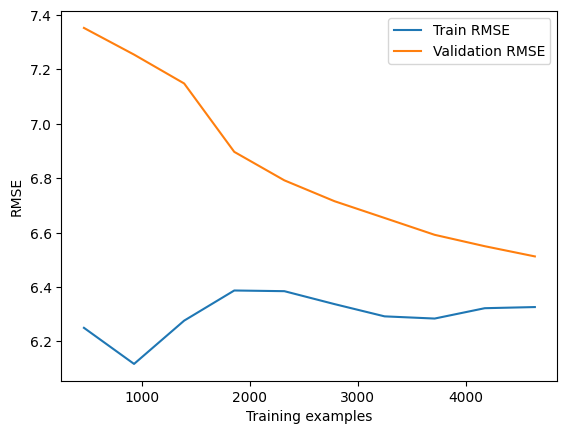

In [104]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np

# use your pipeline and the full data (X, Y)
train_sizes, train_scores, val_scores = learning_curve(
    best_model, X, Y,
    cv=TimeSeriesSplit(n_splits=5),
    scoring="neg_root_mean_squared_error",
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

# convert to RMSE
train_rmse = (-train_scores.mean(axis=1))  # already root because we used neg_root_mean_squared_error
val_rmse   = (-val_scores.mean(axis=1))

plt.plot(train_sizes, train_rmse, label="Train RMSE")
plt.plot(train_sizes, val_rmse,   label="Validation RMSE")
plt.xlabel("Training examples")
plt.ylabel("RMSE")
plt.legend()
plt.show()


In [105]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# assume best_model is your tuned pipeline, and you have X_train, X_test, y_train, y_test
train_preds = best_model.predict(X_train)
test_preds  = best_model.predict(X_test)

train_mae = mean_absolute_error(Y_train, train_preds)
test_mae  = mean_absolute_error(Y_test,  test_preds)

print(f"Train MAE: {train_mae:.3f}   Test MAE: {test_mae:.3f}")


Train MAE: 4.849   Test MAE: 4.952


In [106]:
from joblib import dump
dump(best_model, "player_props_model.joblib")

['player_props_model.joblib']

In [1]:
from nba_api.stats.static import players
players.get_players()[0]

{'id': 76001,
 'full_name': 'Alaa Abdelnaby',
 'first_name': 'Alaa',
 'last_name': 'Abdelnaby',
 'is_active': False}

In [14]:
name_to_find = "Mike Conley"

found = False
for i in players.get_players():
    if i["full_name"] == name_to_find:
        found = True
        print(i)

if not found:
    for i in players.get_players():
        if i["first_name"] == name_to_find.split()[0]:
            found = True
            print(i)



{'id': 201144, 'full_name': 'Mike Conley', 'first_name': 'Mike', 'last_name': 'Conley', 'is_active': True}
